In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
mat = scipy.io.loadmat("datafile.mat")

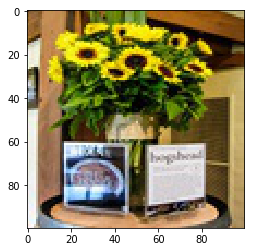

In [3]:
plt.imshow(mat['x'][2286].reshape(100,100,3))

In [4]:
data = mat['x']
labels = mat['y'].reshape(2287,-1)
print(data.shape)
print(labels.shape)

(2287, 30000)
(2287, 1)


In [5]:
batch_size = 32
num_classes = 3
epochs = 100

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=1)
X_train = ((X_train.reshape(-1,100,100,3)).astype('float32'))/255
X_test = ((X_test.reshape(-1,100,100,3)).astype('float32'))/255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2058, 100, 100, 3)
(229, 100, 100, 3)
(2058, 3)
(229, 3)


In [14]:
def create_model():
    model = Sequential()
    model.add(Conv2D(24, (3, 3), padding='same',input_shape=(100,100,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.50))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

In [15]:
model = create_model()

In [ ]:
"""model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)"""

In [21]:
model.load_weights('weights')

In [22]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

229/229 [==============================] - 3s 14ms/step
Test loss: 2.0811496228630366
Test accuracy: 0.7641921399982735


In [23]:
predictions = model.predict(X_test)

In [26]:
# you can change i from 0 to 228 because there are 229 test images 
i = 157
print("predicted output:")
if np.argmax(predictions[i]) == 0:
    print("dandelion")
if np.argmax(predictions[i]) == 1:
    print("rose")
if np.argmax(predictions[i]) == 2:
    print("sunflower")

predicted output:
sunflower


array([0., 0., 1.], dtype=float32)

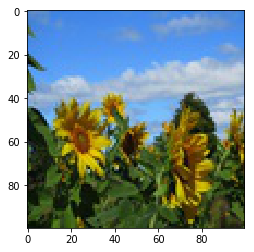

In [27]:
plt.imshow(X_test[i])
y_test[i]

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 24)      672       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 24)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        6944      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
__________